In [1]:
import numpy as np
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi
log = np.log
exp = np.exp
sin = np.sin
sinh = np.sinh
tan = np.tan
tanh = np.tanh
arctan = np.arctan
arctanh = np.arctanh

In [3]:
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*f(t[i], w[i])
        #print(w[i+1],w[i],h,t[i],w[i],f(t[i],w[i]))
        
    return t, w

In [4]:
def Explicit_trapezoid_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + (f(t[i], w[i]) + f(t[i] + h, w[i] + h*f(t[i], w[i])))*(h/2)
        
    return t, w

In [5]:
a, b = 0, 300
h = 3.0
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1
lamb= 1.0

def f(t, y):
    return lamb*y

def exact_sol(t):
    return np.exp(lamb*t)

true_value = exact_sol(t_list)
t, w = Euler_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value[::10], "Approximations": w[::10], "Global truncation error": global_error[::10], 't =': t[::10]}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.0,1.000000e+00,1.000000e+00,0.000000e+00
30.0,1.068647e+13,1.048576e+06,1.068647e+13
60.0,1.142007e+26,1.099512e+12,1.142007e+26
90.0,1.220403e+39,1.152922e+18,1.220403e+39
120.0,1.304181e+52,1.208926e+24,1.304181e+52
150.0,1.393710e+65,1.267651e+30,1.393710e+65
180.0,1.489384e+78,1.329228e+36,1.489384e+78
210.0,1.591627e+91,1.393797e+42,1.591627e+91
240.0,1.700888e+104,1.461502e+48,1.700888e+104


In [6]:
a, b = 0, 300
h = 0.5
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1
lamb= -1.0

def f(t, y):
    return lamb*y

def exact_sol(t):
    return np.exp(lamb*t)

true_value = exact_sol(t_list)
t, w = Euler_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value[::10], "Approximations": w[::10], "Global truncation error": global_error[::10], 't =': t[::10]}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.0,1.000000e+00,1.000000e+00,0.000000e+00
5.0,6.737947e-03,9.765625e-04,5.761384e-03
10.0,4.539993e-05,9.536743e-07,4.444626e-05
15.0,3.059023e-07,9.313226e-10,3.049710e-07
20.0,2.061154e-09,9.094947e-13,2.060244e-09
...,...,...,...
280.0,2.497728e-122,2.649735e-169,2.497728e-122
285.0,1.682956e-124,2.587632e-172,1.682956e-124
290.0,1.133967e-126,2.526984e-175,1.133967e-126


In [7]:
a, b = 0, 300
h = 0.5
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1
lamb= -1.0

def f(t, y):
    return lamb*y

def exact_sol(t):
    return np.exp(lamb*t)

true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value[::10], "Approximations": w[::10], "Global truncation error": global_error[::10], 't =': t[::10]}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.0,1.000000e+00,1.000000e+00,0.000000e+00
5.0,6.737947e-03,9.094947e-03,2.357000e-03
10.0,4.539993e-05,8.271806e-05,3.731813e-05
15.0,3.059023e-07,7.523164e-07,4.464141e-07
20.0,2.061154e-09,6.842278e-09,4.781124e-09
...,...,...,...
280.0,2.497728e-122,4.929578e-115,4.929577e-115
285.0,1.682956e-124,4.483425e-117,4.483425e-117
290.0,1.133967e-126,4.077651e-119,4.077651e-119


# 例1

In [13]:
a, b = 0, 100
h = 0.1
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1/2.0

def f(t, y):
    return 10*(1.0-y)

def exact_sol(t):
    return 1.0-np.exp(-10.0*t)/2.0

true_value = exact_sol(t_list)
t, w = Euler_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

step=50
DF({"True":true_value[::step], "Approximations": w[::step], "Global truncation error": global_error[::step], 't =': t[::step]}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.0,0.5,0.5,0.0
5.0,1.0,1.0,0.0
10.0,1.0,1.0,0.0
15.0,1.0,1.0,0.0
20.0,1.0,1.0,0.0
25.0,1.0,1.0,0.0
30.0,1.0,1.0,0.0
35.0,1.0,1.0,0.0
40.0,1.0,1.0,0.0


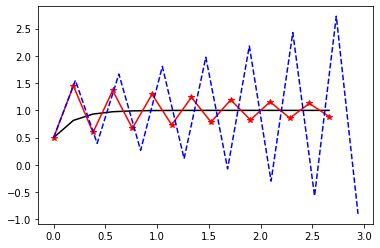

In [14]:
t1, w1 = Euler_method(f, a, b, 0.19, y_0)
t2, w2 = Euler_method(f, a, b, 0.21, y_0)
plt.plot(t1[:15],true_value[:15],'k-',t1[:15],w1[:15],'r-*',t2[:15],w2[:15],'b--')

# 后向欧拉方法

In [15]:
def Euler_method_backward(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = (w[i] + 10.0*h)/(1+10.0*h)
        
    return t, w

In [16]:
a, b = 0, 100
h = 2.0
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1/2.0

def f(t, y):
    return 10*(1.0-y)

def exact_sol(t):
    return 1.0-np.exp(-10.0*t)/2.0

true_value = exact_sol(t_list)
t, w = Euler_method_backward(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value, "Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.0,0.5,0.500000,0.000000e+00
2.0,1.0,0.976190,2.380952e-02
4.0,1.0,0.998866,1.133787e-03
6.0,1.0,0.999946,5.398985e-05
8.0,1.0,0.999997,2.570945e-06
10.0,1.0,1.000000,1.224260e-07
12.0,1.0,1.000000,5.829808e-09
14.0,1.0,1.000000,2.776099e-10
16.0,1.0,1.000000,1.321943e-11


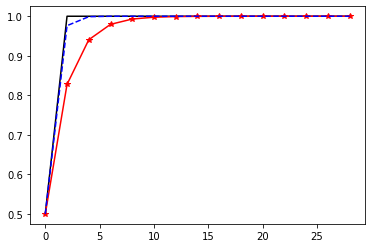

In [17]:
t, w1 = Euler_method_backward(f, a, b, 0.19, y_0)
t, w2 = Euler_method_backward(f, a, b, 2.0, y_0)
plt.plot(t[:15],true_value[:15],'k-',t[:15],w1[:15],'r-*',t[:15],w2[:15],'b--')

# 改进的欧拉方法

In [18]:
def Euler_method_improved(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = ((1-5*h)*w[i] + 10.0*h)/(1+5.0*h)
        
    return t, w

In [19]:
a, b = 0, 3
h = 0.21
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1/2.0

def f(t, y):
    return 10*(1.0-y)

def exact_sol(t):
    return 1.0-np.exp(-10.0*t)/2.0

true_value = exact_sol(t_list)
t, w = Euler_method_improved(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value, "Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.000000,0.500000,0.500000,0.000000e+00
0.214286,0.941340,1.012195,7.085470e-02
0.428571,0.993118,0.999703,6.584451e-03
0.642857,0.999193,1.000007,8.146327e-04
0.857143,0.999905,1.000000,9.454397e-05
1.071429,0.999989,1.000000,1.111689e-05
1.285714,0.999999,1.000000,1.303613e-06
1.500000,1.000000,1.000000,1.529537e-07
1.714286,1.000000,1.000000,1.794404e-08


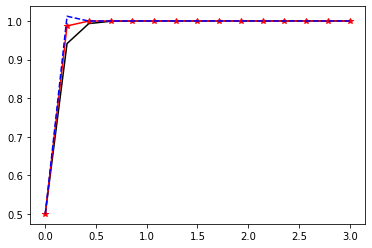

In [20]:
t, w1 = Euler_method_improved(f, a, b, 0.19, y_0)
t, w2 = Euler_method_improved(f, a, b, 0.21, y_0)
plt.plot(t[:15],true_value[:15],'k-',t[:15],w1[:15],'r-*',t[:15],w2[:15],'b--')

# 显式梯形方法

In [21]:
a, b = 0, 3
h = 0.21
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1/2.0

def f(t, y):
    return 10*(1.0-y)

def exact_sol(t):
    return 1.0-np.exp(-10.0*t)/2.0

true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"True":true_value, "Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,True,Approximations,Global truncation error
t =,,,
0.000000,0.500000,0.500000,0.000000
0.214286,0.941340,0.447500,0.493840
0.428571,0.993118,0.389487,0.603631
0.642857,0.999193,0.325384,0.673809
0.857143,0.999905,0.254549,0.745356
1.071429,0.999989,0.176277,0.823712
1.285714,0.999999,0.089786,0.910213
1.500000,1.000000,-0.005787,1.005787
1.714286,1.000000,-0.111394,1.111394


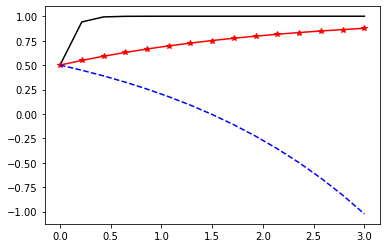

In [22]:
t, w1 = Explicit_trapezoid_method(f, a, b, 0.19, y_0)
t, w2 = Explicit_trapezoid_method(f, a, b, 0.21, y_0)
plt.plot(t[:15],true_value[:15],'k-',t[:15],w1[:15],'r-*',t[:15],w2[:15],'b--')

# 例2

In [23]:
import numpy as np
def Euler_method_backward(f, df, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        print("at: ",i)
        error=1
        x0=w[i]
        j=0
        while error>5.0*10**(-8):
            j=j+1
            if(j>5):
                break
            x1=x0-(x0-w[i]-h*f(t[i+1],x0))/(1-h*df(t[i+1],x0))
            error=abs(x1-x0)
            print(error)
            x0=x1
        w[i+1]=x1
                
    return t, w

In [24]:
a, b = 0, 3
h = 0.3
n=int((b-a)/h)
t_list = np.linspace(a, b, n+1)
y_0 = 1/2.0

def f(t, y):
    return y+8*y**2-9*y**3

def df(t,y):
    return 1+16*y-27*y**2

t, w = Euler_method_backward(f,df, a, b, h, y_0)

at:  0
1.269230769230769
0.46569821687746216
0.282066283046718
0.1385254932957608
0.0380110954409153
at:  1
0.13935536394938908
0.024486363001858802
0.0009287890875671057
1.3072688272997013e-06
2.58748578119139e-12
at:  2
0.03214249919143508
0.001445380517866468
3.0262643455625238e-06
1.324818033054953e-11
at:  3
0.00790698285724023
8.874263286062778e-05
1.126534632245324e-08
at:  4
0.0019692290311533744
5.52076278814706e-06
4.347322501985218e-11
at:  5
0.0004918453207134466
3.446442181642695e-07
1.6930901125533637e-13
at:  6
0.00012293258064732804
2.1533949623453452e-08
at:  7
3.07313502100337e-05
1.3457731595778455e-09
at:  8
7.682725397528678e-06
8.410927510027477e-11
at:  9
1.9206743402389037e-06
5.256906021600116e-12


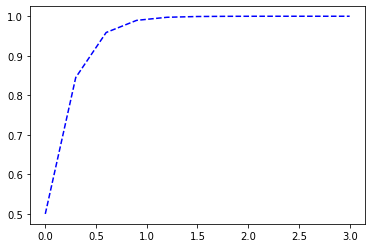

In [25]:
plt.plot(t,w,"b--")
plt.show()

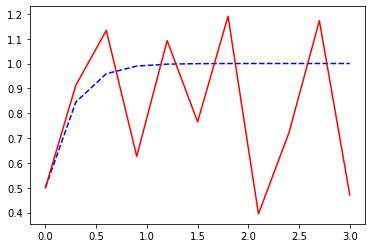

In [26]:
import matplotlib.pyplot as plt
h=0.3
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*f(t[i], w[i])
        #print(w[i+1],w[i],h,t[i],w[i],f(t[i],w[i]))
        
    return t, w

t2, w2 = Euler_method(f, a, b, h, y_0)


plt.plot(t,w,"b--",t2,w2,'r-')
plt.show()